# ДЗ 6 неделя

## Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats.stats as st


warnings.filterwarnings('ignore')

## Первая задача

Вы работаете аналитиком в продуктовом магазине. Даны продажи молока по дням недели. Вы обнаружили, что есть есть несколько выбросов в данных - суперзавышенные значения в воскресные дни. Необходимо составить программу, которая вместо этих выбросов вставляла бы медианное значение всех воскресных продаж.

При расчёте учитывать:
- дни недели в таблице даны как: понедельник, вторник, среда, четверг, пятница, суббота, воскресенье
- уровень выброса рассчитывать с помощью техники тройного интерквартильного размаха.

Вывести первые 25 значений скорректированной таблицы.

Данные находятся в файле data.csv.
Разделитель значений - точка с запятой. Разделителем дробных чисел применяется запятая. В таблице даны два столбца. Названия столбцов - показаны ниже

в первом столбце - день
во втором столбце - молоко

In [2]:
def get_quantile(data, col):
    # Вычисляем первый и третий квартили
    quantile_1 = data[col].quantile(0.25)
    quantile_3 = data[col].quantile(0.75)
    # Вычисляем интерквартильный размах (IQR)
    IQR = quantile_3 - quantile_1
    # Определяем границы выбросов
    lower_bound = quantile_1 - 1.5 * IQR
    upper_bound = quantile_3 + 1.5 * IQR
    return lower_bound, upper_bound


df = pd.read_csv("tag_1.csv", encoding="cp1251", sep=";").dropna()
median = df[df["день"] == "воскресенье"]["молоко"].median()
l, u = get_quantile(df, "молоко")
df.loc[((df["молоко"] < l) | (df["молоко"] > u)) & (df["день"] == "воскресенье"), "молоко"] = median
df.head(25)

,день,молоко
0,понедельник,105.0
1,вторник,139.0
2,среда,134.0
3,четверг,130.0
4,пятница,139.0
5,суббота,131.0
6,воскресенье,129.5
7,понедельник,136.0
8,вторник,125.0
9,среда,130.0


## Вторая задача

На этот раз вы работаете в компании, которая обслуживает сервис по продаже автомобилей с пробегом. Поступила задача на разработку приложения для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. На первом шаге построения прогнозной модели нужно проанализировать данные на пропуски и заполнить их. Этим вам и предстоит заняться.

Необходимо сделать:

- В данных VehicleType были обнаружены пропуски. Причём по группе бренд-марка встречается несколько строк. Вам нужно заполнить их по такому правилу: вставить наиболее часто встречаемый тип кузова у сочетания бренд-марка.
Пример: Если по сочетанию “volkswagen-golf” наиболее встречаемый тип кузова “small”. Поэтому Nan надо заполнить именно этим кузовом. Если по группе бренд-марка нет данных по кузову, то такие строки заполнить группой “unknown”.

- Сформировать сводную таблицу из таких столбцов [Brand, VehicleType, Price].
Цену вставить медианную по группам [Brand, VehicleType].
Таблицу отсортировать по цене в порядке убывания и вывести первые первые 10 строк. Нумерацию индексов сделать заново. Названия столбцов использовать как в задании.

Данные находятся в файле data.csv.
Разделитель значений - точка с запятой. Разделителем дробных чисел применяется запятая. В таблице даны семь столбцов.

In [3]:
df = pd.read_csv("tag_2.csv", encoding="cp1251", sep=";")
new_df = df.dropna().groupby(["Brand", "Model"])["VehicleType"].agg("max")

for index in new_df.index:
    df.loc[(df["Brand"] == index[0]) & (df["Model"] == index[1]) 
           & (df["VehicleType"].isnull()), "VehicleType"] = new_df[index]
df = df.fillna("unknown")
p_df = df.pivot_table(index=["Brand", "VehicleType"], values="Price", aggfunc="median").reset_index()
p_df.sort_values(by="Price", ascending=False, inplace=True)
p_df.reset_index(drop=True, inplace=True)
p_df.head(10)

,Brand,VehicleType,Price
0,volkswagen,suv,15600.0
1,bmw,suv,14800.0
2,chevrolet,wagon,13499.0
3,skoda,suv,13200.0
4,mercedes_benz,convertible,12790.0
5,volvo,convertible,12400.0
6,volkswagen,coupe,11500.0
7,porsche,convertible,10450.0
8,nissan,coupe,10200.0
9,peugeot,bus,10000.0


## Третье задание

В отделе качества промышленного завода производят анализ факторов, влияющих на качество производства. На первом шаге необходимо заполнить пропуски в имеющейся таблице данных.

Данные находятся в файле data.csv.
Разделитель значений - точка с запятой. Разделителем дробных чисел применяется запятая. В таблице даны три столбца. Названия столбцов - показаны ниже
- key - номер группы (по одной группе есть несколько измерений изделия)
- вес - вес изделия
- затрачиваемая мощность - потраченная при производстве электрическая мощность

Пропуски заполнять следующим образом:

1) пропуск в факторе “вес” заполнить предыдущим значением

2) в факторе “затрачиваемая мощность” могут встречаться одиночные пропуски и несколько пропусков подряд. Одиночные пропуски и первый из пропусков из нескольких подряд заполнить методом интерполяции. А оставшиеся пропуски в этом факторе заполнить групповой медианой по группам, которая указана в столбце “key”.

3) создать новую таблицу, произведя суммирование каждого фактора по группе ”key”

Вывести первые 30 строк новой таблицы, состоящей из двух факторов ['вес', 'затрачиваемая_мощность']. Итоговые значения округлить до целого. Названия столбцов привести к формату PEP8 (кириллицу оставляем).



In [4]:
df = pd.read_csv("tag_3.csv", encoding="cp1251", sep=";", decimal=",")
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")
df["вес"].ffill(inplace=True)
df["затрачиваемая_мощность"].interpolate(limit=1, method="linear", inplace=True)
medians = df.groupby("key")["затрачиваемая_мощность"].median()
df["затрачиваемая_мощность"] = df.apply(
    lambda row: medians[row["key"]] if pd.isna(row["затрачиваемая_мощность"]) else row["затрачиваемая_мощность"], 
    axis=1
)
new_df = df.groupby('key', as_index=False).sum().round()
new_df[["вес", "затрачиваемая_мощность"]].head(30)

,вес,затрачиваемая_мощность
0,9630.0,39.0
1,7938.0,37.0
2,9589.0,41.0
3,8089.0,36.0
4,7945.0,33.0
5,7920.0,36.0
6,7944.0,35.0
7,7983.0,38.0
8,9540.0,45.0
9,11090.0,61.0


## Четвёртая задача

Вы работаете аналитиком в интернет-магазине. Компания ведёт активную продажу товаров для населения. Часть покупателей снизила свою покупательскую активность. Необходимо исследовать данные, чтобы выявить причину этого.

Для этого провести следующие работы:

В факторе “выручка” есть пропуски и есть выбросы в бОльшую сторону.

сначала пропуски заполнить групповой медианой
потом выбросы заменить также групповой медианой.
Необходимо написать программу, которая бы выводила р-уровень при сравнении всех количественных факторов продаж по двум группам между собой.

группа покупателей 1: покупатели типа товара “товары для себя” и снизили покупательскую активность
группа покупателей 2: покупатели типа товара “товары для себя”, а покупательская активность осталась на “Прежний уровень”
В расчётах учесть:

Группа это: двойная группировка по факторам “покупательская активность” и “тип товара”
Выбросы по выручке - только в большую сторону. Для очистки применить алгоритм тройного интерквартильного размаха
Если данные в обеих группах распределены нормально, то для сравнения использовать метод Стьюдент с различной дисперсией. Если хотя бы в одной группе - не нормальное распределение, то для сравнения использовать метод Манн-Уитни. Для проверки на нормальность использовать метод Шапиро c уровнем принятия решения 0.05
Данные загружаются из csv_файла, разделителем является ; а разделитель десятичных значений в данных - запятая
Результат вывести в виде списка списков. Первый список - названия выводимых результатов: ['показатель', 'р-уровень', 'метод расчёта']. Остальные списки - расчёты по каждому показателю(фактору)
Названия факторов в таблице привести к стандарту PEP8. Кириллицу оставляем
Описание исходных данных

Данные находятся в файле data.csv.
Разделитель значений - точка с запятой. Разделителем дробных чисел применяется запятая. В таблице даны три столбца. Названия столбцов - показаны ниже.

Описание:

в первом столбце Покупательская активность - активность покупателя. Два уровня: “Снизилась” и “Прежний уровень”
в втором столбце тип товара - два типа товара: “товары для себя” и “товары для дома”
в третьем столбце История продаж - показывает, сколько дней уже покупатель зарегистрирован на сайте, в днях
в четвёртом столбце Неоплаченные_товары - сколько товаров покупатель положил в корзину, но не оплатил, в штуках
в пятом столбце Выручка -выручка покупателя в рублях за месяц


In [5]:
# не решил

## Пятая задача

Возвращаемся в проект по предсказанию цены на автомобиль. Данные находятся в файле data.csv. С качеством данных поработали в задаче 6.2. Теперь надо провести графический анализ.

id : номер в базе данных
Price : цена автомобиля
RegistrationYear : год выпуска
Power : мощность
Brand : бренд
Model : модель

Необходимо сделать:

1) Перевести название колонок в стандарт PEP8:
- перевести в нижний регистр
- пробелы между словами заменить на _

2) Создать новый фактор на основе года выпуска автомобиля:
- если год менее или равен 1980, то обозначить раритет
- если год более 1980, но менее или равен 2010, то обозначить старые
- если год более 2010, но менее или равен 2020, то обозначить массовые
- если год более 2020 то обозначить современные

3) отобрать данные по условиям:
- выбирать бренд автомобиля, который вводится с экрана
- по выбранному бренду отобрать только те, у которых мощность более 30, а цена более 0

4) По выбранной группе автомобилей построить изображение трёх графиков, которые должны быть расположены в одном ряду:
- первый график: круговая диаграмма по новому фактору, в котором мы закодировали возраст автомобиля (раритет, старый и т.д.)
- второй график: гистограмма цены автомобиля с параметром количества столбцов 20. Использовать сиборн. И вывести также график оценки плотности
- третий график: диаграмма рассеяния. Ось ОХ - это мощность. Ось OY - это цена
- размер изображения: 11х4 дюймов

5) Параметры и оформление картинки с изображением графиков:
- оси OY не подписывать
- ось OX на втором и третьем графике подписать "Цена" и "Мощность" соответственно. Шрифт выбрать 13
- сделать подпись всего изображения.

Название: Исследование данных по моделям автомобилей
Шрифт выбрать 16. Отступ заголовка до начала графиков выбрать 1.01

Сохраните диаграмму в файл target_6_5.png.

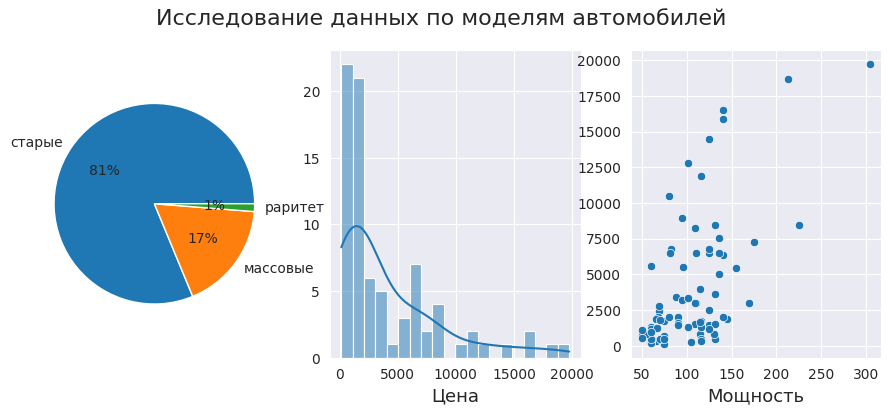

In [6]:
df = pd.read_csv("tag_5.csv", encoding="cp1251", sep=";", decimal=",")
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")
df["age"] = df["registrationyear"].apply(
    lambda x: "раритет" if x <= 1980 else (
        "старые" if x <= 2010 else (
            "массовые" if x <= 2020 else "современные"
        )
    )
)

brand = input()
filtered_df = df[(df["brand"] == brand) & (df["power"] > 30) & (df["price"] > 0)]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(11, 4))

filtered_df["age"].value_counts().plot(kind="pie", ax=ax1, autopct='%1.0f%%')
sns.histplot(data=filtered_df["price"], bins=20, ax=ax2, kde=True)
sns.scatterplot(data=filtered_df, x="power", y="price", ax=ax3)

ax1.set_ylabel("")
ax2.set_ylabel("")
ax3.set_ylabel("")

ax2.set_xlabel("Цена", fontsize=13)
ax3.set_xlabel("Мощность", fontsize=13)
plt.suptitle("Исследование данных по моделям автомобилей", fontsize=16)

plt.savefig("target_6_5.png")